In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nilearn 

from nilearn import image
from pathlib import Path

In [15]:
sub24_nc_file = Path('E:/fmri_processing/results/visualization/sub-24/sub-24_nc_volume.nii.gz')
sub24_nc = image.load_img(sub24_nc_file)

<class 'nibabel.nifti1.Nifti1Image'>


In [5]:
sub24_nc.shape

(66, 78, 65)

In [6]:
sub24_100_cutoff = sorted(np.ravel(sub24_nc.get_fdata()), reverse=True)[1000]
sub24_100_cutoff

12.004019737243652

In [7]:
sub24_nc_top100 = np.where(sub24_nc.get_fdata() >= sub24_100_cutoff, 1,0)

In [8]:
sub24_nc_top100.shape

(66, 78, 65)

In [9]:
print(sub24_nc.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 66 78 65  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.    2.196 2.196 2.2   1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -69.00267
qoffset_y       : -74.414696
qoffset_z       : -40.306507
srow_x          : [

1st dimension (left-to-right), lowest = left, highest = right
2nd dimension (anterior-posterior), lowest = back of brain, highest = front
3rd dimension (rostral-caudal), lowest = bottom, highest = top

In [11]:
len(np.argwhere(sub24_nc_top100 > 0))

1001

In [12]:
top100_indices = np.argwhere(sub24_nc_top100 > 0)

In [13]:
top100_indices[:,1]

array([23, 22, 42, ..., 39, 26, 41], dtype=int64)

Text(0.5, 1.0, 'Histogram of voxel on anterior-posterior axis (lower = further back)')

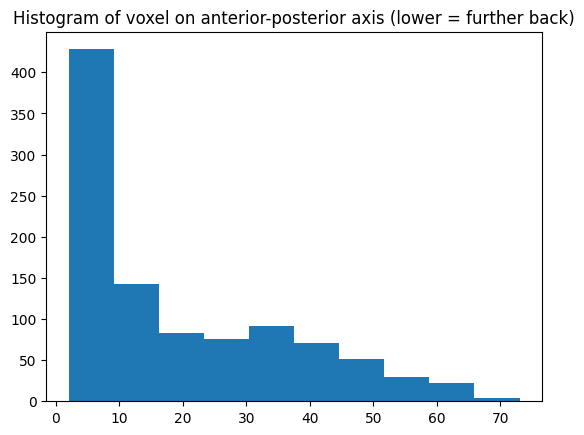

In [14]:
plt.hist(top100_indices[:,1])
plt.title('Histogram of voxel on anterior-posterior axis (lower = further back)')

Do this for the 10 subjects, 5 low scoring, 5 high scoring. 
Plot them together in a (5,2) plot and we can compare if there is a difference or not